In [55]:
'''import thpe libraries'''
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
import hashlib
import joblib
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score
import math

plt.style.use('fivethirtyeight')

In [2]:
'''load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

'''Update the datetime columns from String to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

In [88]:
loan_data_2018 = loan_data[loan_data['issue_d'].dt.year == 2018]
loan_data_2018 = loan_data_2018[loan_data_2018['loan_status'] != 'Fully Paid']
loan_data_2018.shape

(17684, 38)

In [89]:
loan_data_2018['loan_status'].value_counts()

Charged Off           6942
Late (31-120 days)    6509
In Grace Period       2901
Late (16-30 days)     1323
Default                  9
Name: loan_status, dtype: int64

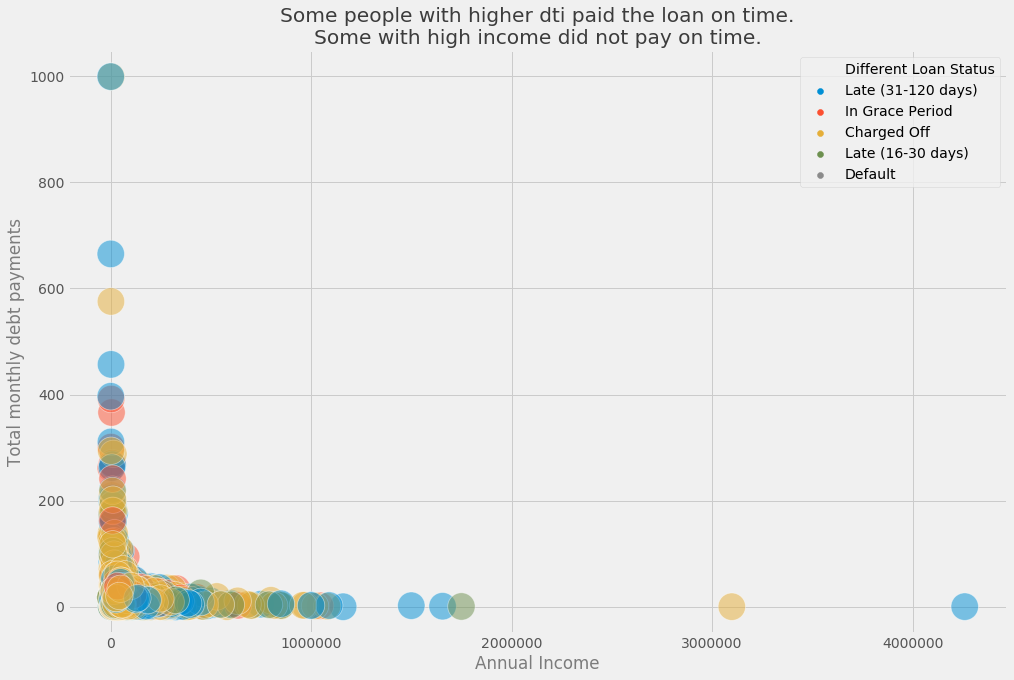

In [92]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

g = sns.scatterplot(x="annual_inc", y="dti", hue='loan_status', data=loan_data_2018, alpha=0.5, s=750)

ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='upper right')
plt.title('Some people with higher dti paid the loan on time.\nSome with high income did not pay on time.', 
          alpha = 0.75)
plt.xlabel('Annual Income', alpha = 0.75)
plt.ylabel('Total monthly debt payments', alpha = 0.75)

l = g.legend()
l.texts[0].set_text("Different Loan Status")


loan_datatxt1 = "Annual Income: ${}, {} "   
for i, loan_status in enumerate(loan_data_2018.loan_status):
  if(loan_data_2018.annual_inc[i] > 4000000 and loan_status != 'Fully Paid'):
    plt.text(loan_data_2018.annual_inc[i], loan_data_2018.dti[i], 
             txt1.format(loan_data_2018.annual_inc[i], loan_status))
    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['dti'])
r_value = r_value*r_value

txt2 = "R-squared = {:1.3f}" 
#plt.text(x=2000000, y=500, s=txt2.format(r_value), fontsize=30, alpha=0.85)

plt.show()

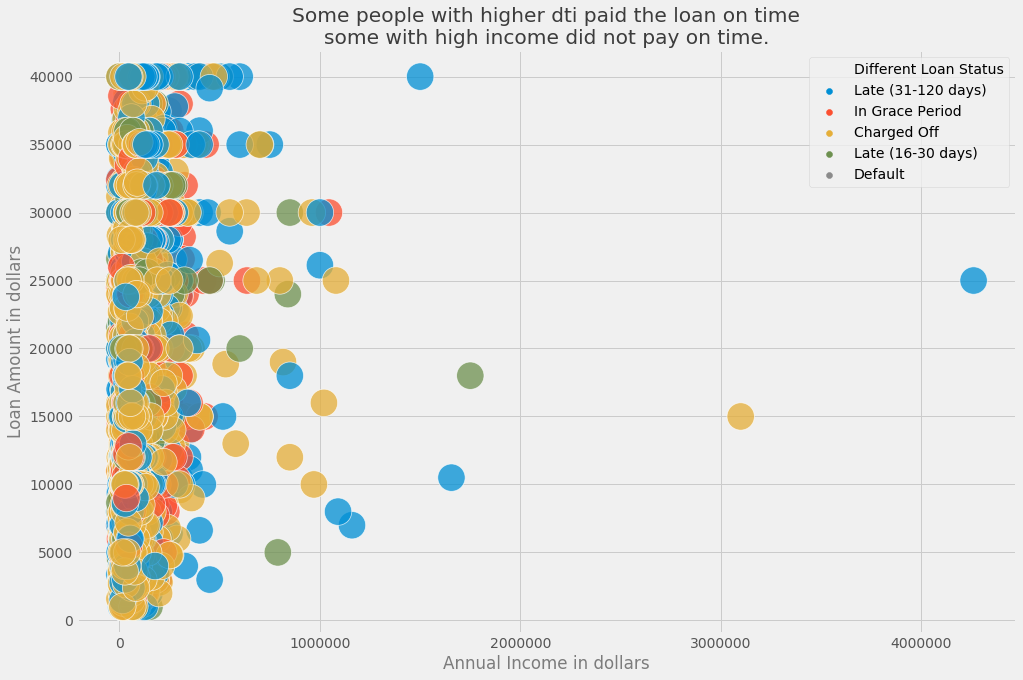

In [93]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

g = sns.scatterplot(x="annual_inc", y="loan_amnt", hue='loan_status', data=loan_data_2018, alpha=0.75, s=750)

ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='upper right')
plt.title('Some people with higher dti paid the loan on time\nsome with high income did not pay on time.', 
          alpha = 0.75)
plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Loan Amount in dollars', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['loan_amnt'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
#plt.text(x=4000000, y=20000, s=txt2.format(r_value), fontsize=30, alpha=0.85)

l = g.legend()
l.texts[0].set_text("Different Loan Status")

    
plt.show()

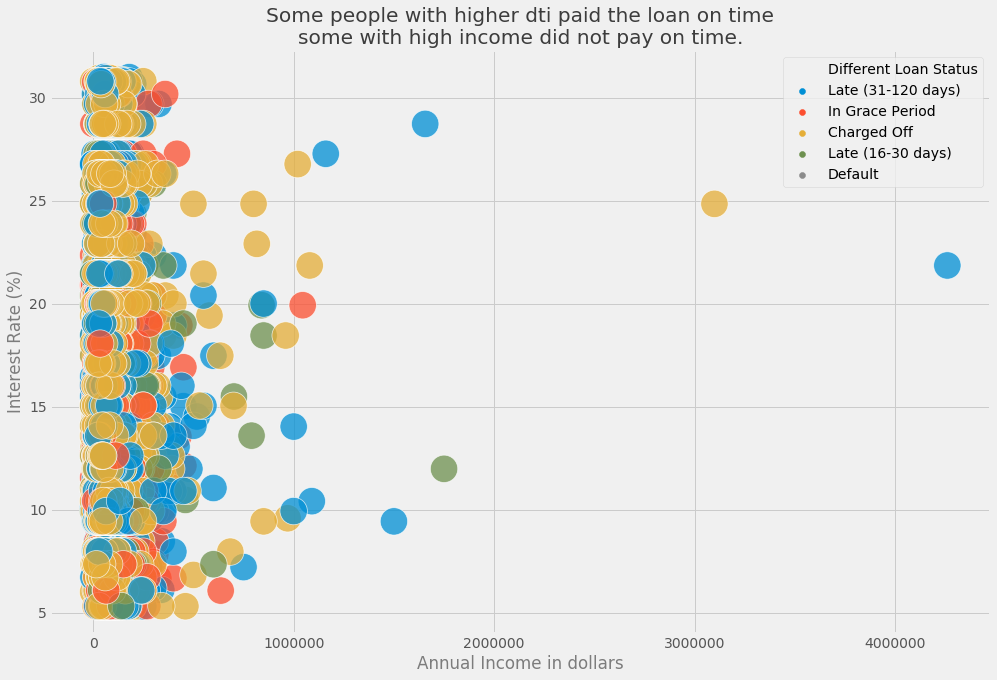

In [94]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

g = sns.scatterplot(x="annual_inc", y="int_rate", hue='loan_status', data=loan_data_2018, alpha=0.75, s=750)

ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='upper right')
plt.title('Some people with higher dti paid the loan on time\nsome with high income did not pay on time.', 
          alpha = 0.75)
plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['int_rate'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
#plt.text(x=4000000, y=15, s=txt2.format(r_value), fontsize=30, alpha=0.85)

l = g.legend()
l.texts[0].set_text("Different Loan Status")

    
plt.show()

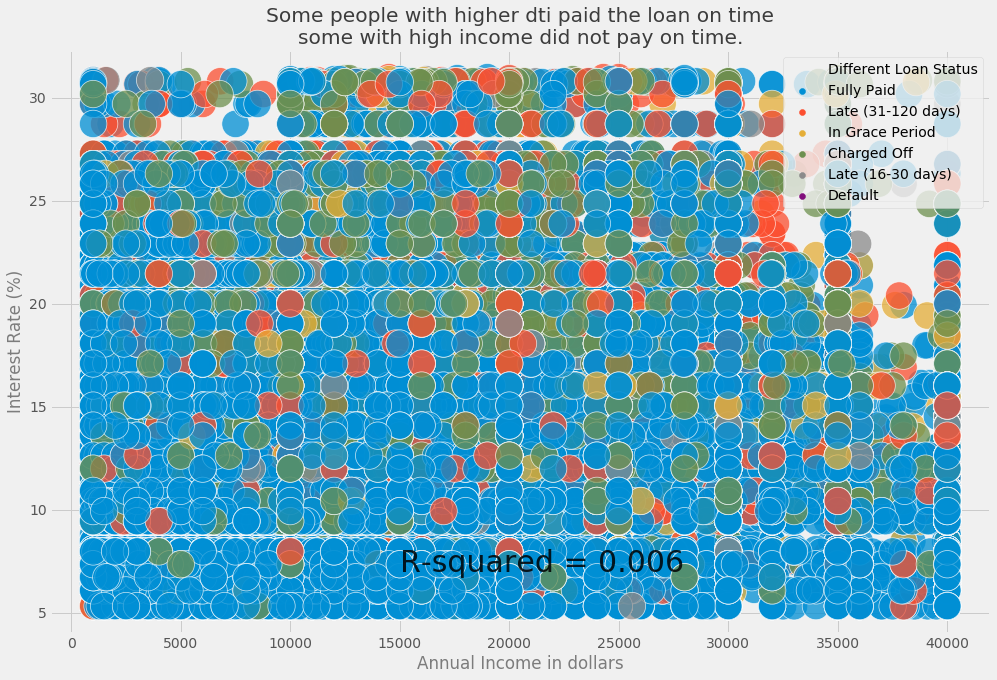

In [71]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

g = sns.scatterplot(x="loan_amnt", y="int_rate", hue='loan_status', data=loan_data_2018, alpha=0.75, s=750)

ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='upper right')
plt.title('Some people with higher dti paid the loan on time\nsome with high income did not pay on time.', 
          alpha = 0.75)
plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['loan_amnt'], loan_data_2018['int_rate'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
plt.text(x=15000, y=7, s=txt2.format(r_value), fontsize=30, alpha=0.85)

l = g.legend()
l.texts[0].set_text("Different Loan Status")

    
plt.show()

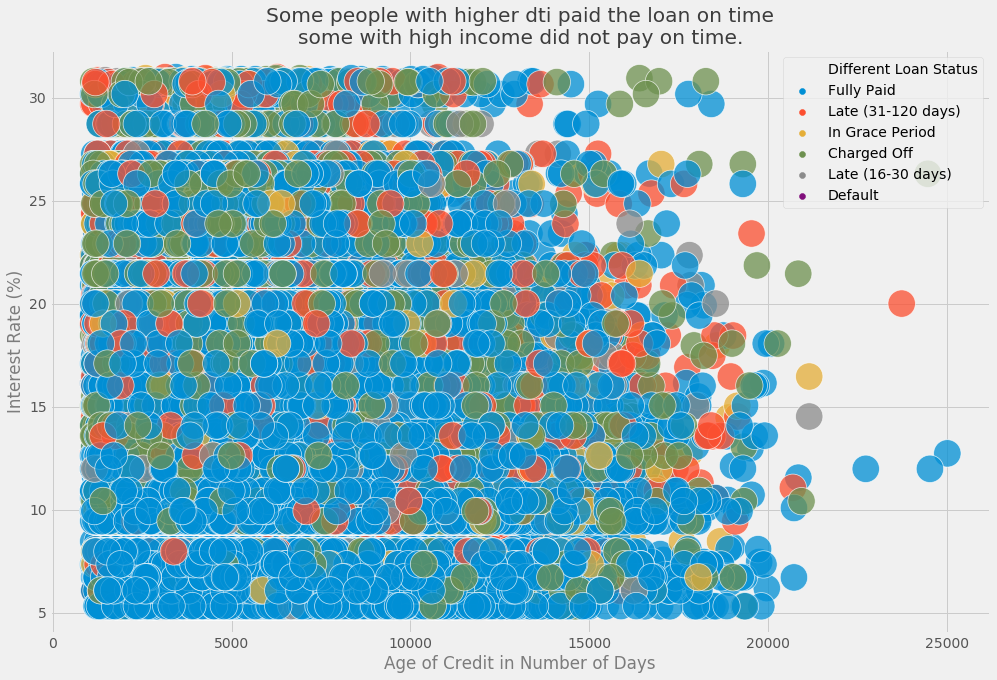

In [73]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

g = sns.scatterplot(x="age_of_credit_in_days", y="int_rate", hue='loan_status', data=loan_data_2018, alpha=0.75, s=750)

ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='upper right')
plt.title('Some people with higher dti paid the loan on time\nsome with high income did not pay on time.', 
          alpha = 0.75)
plt.xlabel('Age of Credit in Number of Days', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['age_of_credit_in_days'], loan_data_2018['int_rate'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
#plt.text(x=15000, y=7, s=txt2.format(r_value), fontsize=30, alpha=0.85)

l = g.legend()
l.texts[0].set_text("Different Loan Status")

    
plt.show()

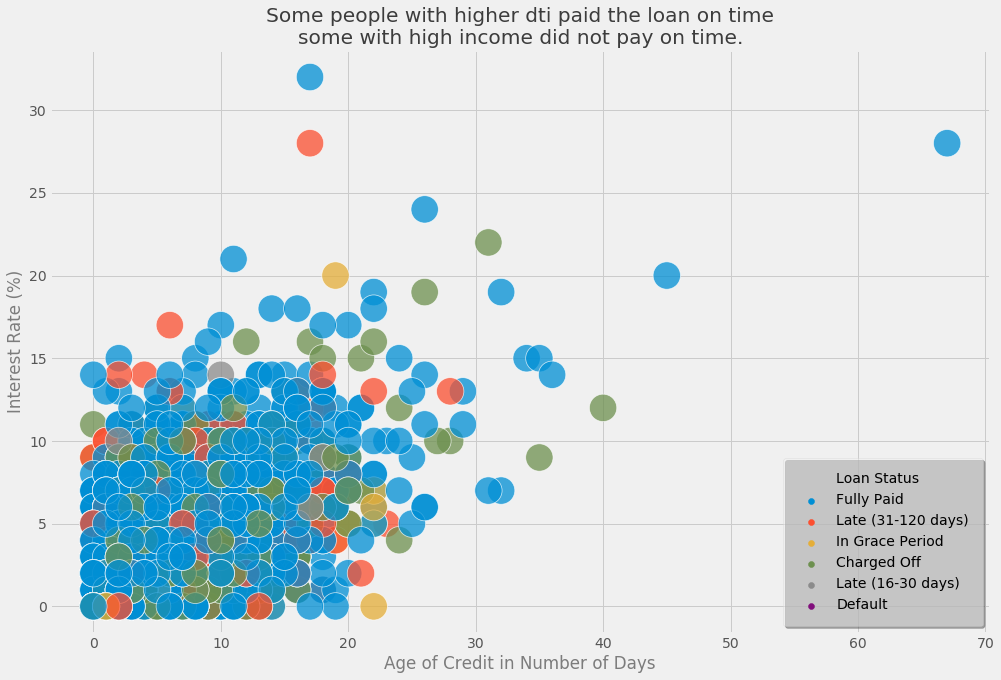

In [82]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

g = sns.scatterplot(x="inq_last_12m", y="inq_fi", hue='loan_status', data=loan_data_2018, alpha=0.75, s=750)

ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='lower right', 
          title='').texts[0].set_text('Loan Status')
plt.title('Some people with higher dti paid the loan on time\nsome with high income did not pay on time.', 
          alpha = 0.75)
plt.xlabel('Age of Credit in Number of Days', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['inq_fi'], loan_data_2018['inq_last_12m'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
#plt.text(x=15000, y=7, s=txt2.format(r_value), fontsize=30, alpha=0.85)
    
plt.show()

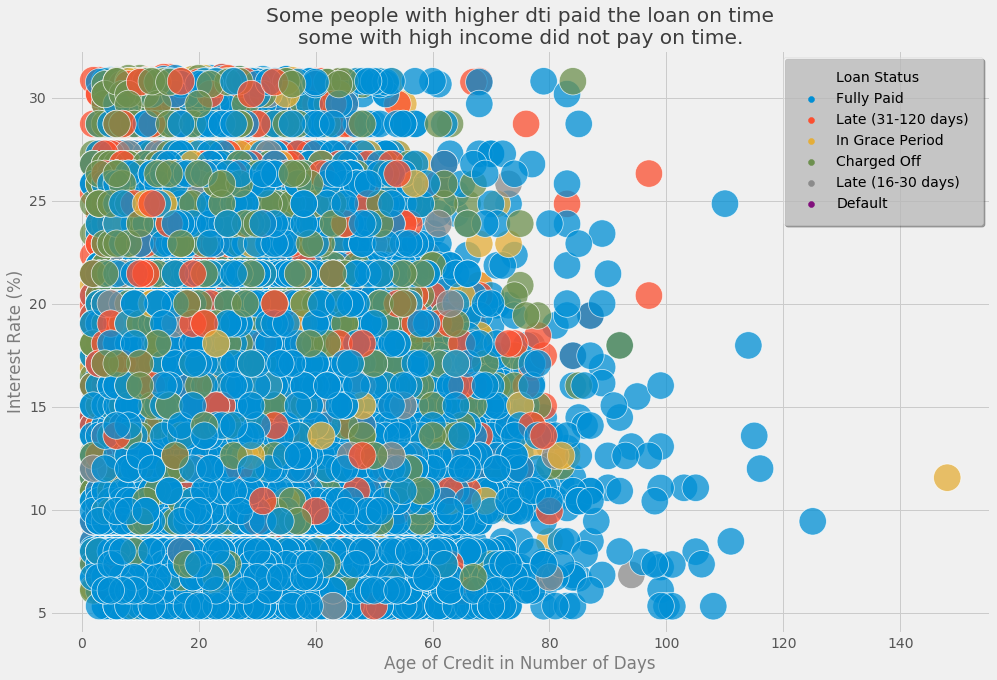

In [84]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

g = sns.scatterplot(x="total_acc", y="int_rate", hue='loan_status', data=loan_data_2018, alpha=0.75, s=750)

ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=1, loc='upper right', 
          title='').texts[0].set_text('Loan Status')
plt.title('Some people with higher dti paid the loan on time\nsome with high income did not pay on time.', 
          alpha = 0.75)
plt.xlabel('Age of Credit in Number of Days', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['total_acc'], loan_data_2018['int_rate'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
#plt.text(x=15000, y=7, s=txt2.format(r_value), fontsize=30, alpha=0.85)
    
plt.show()